# (D+1)-Regular q-Uniform hypergraphs

## we want to have approximately (D+1) hyperedges for each vertex and q vertices per hyperedge

In [1]:
import numpy as np
from itertools import permutations,product
from copy import copy
import timeit as timeit
import matplotlib.pyplot as plt
import csv

n=24
q=4
d=5


### Note that for fixed $n$ , the choice of $d$ to ensure OGP is dependent on $q$ in the sense that there is a number $d^*(q)$ s.t. if $d>d^*(q)$  a random bitstring is unsatisfiable with high probability as $n\rightarrow \infty$ with the ratio $|E|/q$ held fixed. I.e. the ratio of the degree to number of nodes needs to be above some value.

### For fixed $n$ and $q=4$, D-regular q-uniform random graphs have $|E|=\frac{n}{4}d$.

In [2]:
def gen_graph(v,p,k): #vertex, no. int spin, degree (k)
    dic = {}
    for i in range(n): #count how many more hyperedges are needed for each vertex
        dic[f"{i}"]=d
    edges = []
    for i in range(int(v/2)): #for each vertex
        counter=0
        while dic[f"{i}"]>0: #while current vertex has degree<d
            edge = {i,}     #create hyperedge with i 
            #print("start")
            if counter >100:#if fail to get hyperedge
                #print(i,"there")
                break
            while len(edge)<p:  #while hyperedge has less than q vertices
                x=np.random.randint(i+1,high=n)   #get random vertex from i+1 to n
                if dic[f"{x}"]>0:  #check if vertex still is under degree 2
                    if x not in edge:
                        edge.add(x)
                        dic[f"{x}"]-=1
                counter +=1
                #print("middle",edge,counter)
                if counter >100:#if fail to get hyperedge after 1000 iteration, skip
                    #print("triggered")
                    for j in edge:#re-add number back to dictionary
                        if j != i:
                            dic[f"{j}"]+=1
                    break
            if len(edge)== p:#if hyperedge is valid
                edges+=[edge]
                dic[f"{i}"]-=1 #minus from current vertex
                counter=0
                #print(i,"here")
            if counter >100:#if fail to get hyperedge
                #print(i,"there")
                break
    return edges,dic
def leftovers(v,dic):
    left =[]
    for i in range(v): #for each vertex
        if dic[f"{i}"]>0:
            left+=[i,]
    return left

def fingraph(V,HE,p,k,dic): #input vertices and current set of hyperedges, p int spin, and degree k
    lvert=leftovers(V,dic)  #vertices that are leftover (i.e. less than degree k)
    n = len(HE)       #number of hyperedges left
    for i in range(n):
        counter=0
        if lvert==[]:   #if all vertices have degree k
            break
        x=np.random.choice(lvert)  #choose a random vertex in list
        edge ={x}
        dic[f"{x}"]-=1
        if dic[f"{x}"]==0:   #if after adding hyperedge, this vertex has degree k
            lvert.remove(x)
        if len(lvert)<(p-1):     #if list of vertex is less than enough to form hyperedge
            break
        while len(edge)<p:      #while hyperedge does not have p vertices
            x=np.random.choice(lvert)   #choose random vertex
            counter +=1
            if x not in edge:     #if vertex not already in edge
                edge.add(x)
                dic[f"{x}"]-=1
                if dic[f"{x}"]==0:
                    lvert.remove(x)
            if counter >100:
                break
        HE+=[edge]
    return HE

def truegraph(v,p,k):
    theory = v*k/p
    temp=[]
    while len(temp)<int(theory):
        temp,dic=gen_graph(v,p,k)
        temp=fingraph(v,temp,p,k,dic)
    return temp

#edges=gen_graph(n,q,d)
#print(edges)
edges = truegraph(n,q,d)
print("# edges (th):", n*d/q)            
print("# edges (ac):", len(edges))


# edges (th): 35.0
# edges (ac): 35


## Now we want to create the Hamiltonian/ cost function

In [3]:
def coup(HE): #list of hyperedges
    temp = []
    binary = [-1,1]
    for i in range(len(HE)):
        temp+=[np.random.choice(binary)]
    return temp

Js=coup(edges) 

def cost(V,HE,J): #input bitstring, hyperedges, couplings
    count = 0
    for i in range(len(HE)):
        temp = J[i]
        edge = HE[i]
        for z in edge:
            temp*= V[z]
        temp+=1
        count+= 0.5*(temp)
    return count
        

## Create2^n bit strings to enumerate over 

In [143]:
def bitstring(v,m): #input vertices and how many -1
    temp = []
    for i in range(v):
        temp +=[1,]
    for i in range(m):
        temp[i] = -1
    return temp

#print(bitstring(5,3))

def unique_perms(series):
    temp = []
    for p in permutations(series):
        if p in temp:
            continue
        else:
            temp.append(p)
    return temp
#start = timeit.default_timer()
#print(unique_perms(bitstring(n,3)))
#print("The difference of time is :", 
            #  (timeit.default_timer() - start)/60,"min")
    
def Dist(v):
    n=len(v)
    temp=bitstring(n,0)
    return((np.dot(temp,v)/n +1)/2)


In [5]:
def evl(V,HE,J):
    tempx=[]
    tempy=[]
    bit= []
    for j in product([-1, 1], repeat=V):
        if cost(j,HE,J)/len(HE)>0.7: #We only want near optimal solution and roughly optimal solution >0.73
            bit +=[j]
            tempx+=[Dist(j)]
            tempy+=[cost(j,HE,J)/len(HE)]
    return(tempx,tempy,bit)

start = timeit.default_timer()
xdata,ydata,bit=evl(n,edges,Js)
print("The difference of time is :", 
               (timeit.default_timer() - start)/(60),"min")


# f = open('test.csv','w')
# writer = csv.writer(f)
# header = ['bit','overlap', 'Cost']
# writer.writerow(header)
# for i in range(len(xdata)):
#     writer.writerow([bit[i],xdata[i],ydata[i]])
# f.close()


# f = open('Hamiltonian.csv','w')
# writer = csv.writer(f)
# header = ['HE','J']
# writer.writerow(header)
# for i in range(len(edges)):
#     writer.writerow([edges[i],Js[i]])
# f.close()

# plt.scatter(xdata,ydata)

The difference of time is : 1.2258239933333335 min


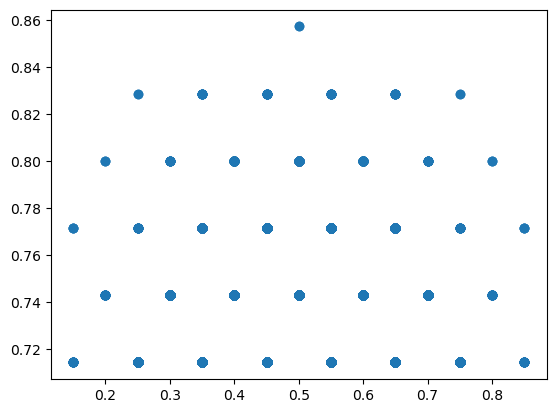

In [6]:
plt.scatter(xdata,ydata)

optimal at roughly distance 0.5 with sub-optimal 0.3 to 0.7

opt distance observed (0.3, 0.4, 0.6, 0.75)

sub opt obvserved (0.25, 0.3 to 0.7)

### $n=24, q=4, d=5$ takes 15 min, so if we want ~ 24 hours, n should be 30 to be ~ 16 hours

In [7]:
# f = open('n24d17.csv','w')
# writer = csv.writer(f)
# header = ['bit','overlap', 'Cost']
# writer.writerow(header)
# for i in range(len(xdata)):
#     writer.writerow([bit[i],xdata[i],ydata[i]])
# f.close()


# f = open('H_n24_d17.csv','w')
# writer = csv.writer(f)
# header = ['HE','J']
# writer.writerow(header)
# for i in range(len(edges)):
#     writer.writerow([edges[i],Js[i]])
# f.close()

# plt.scatter(xdata,ydata)

### for n=24 and d=3, takes about 11 min and n=24,d=17 takes roughly 1 hour (58 min)

In [8]:
max(ydata)

0.8571428571428571

In [9]:
def eopt(databit,datay):
    temp = []
    x=max(datay)
    for i in range(len(datay)):
        if datay[i]>0.96*x:
            temp+=[databit[i]]
    return temp

A=eopt(bit,ydata)
print(len(A))

54


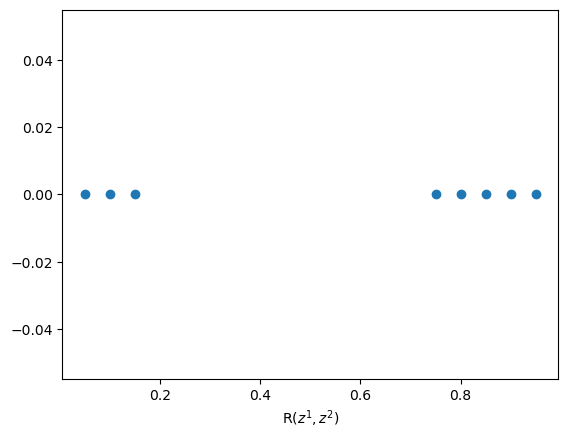

In [272]:
def Ham(s,t):
    n=len(s)
    return(1-((np.dot(s,t)/n +1)/2))

def OGP(data):
    C=set()
    for i in range(len(data)):
        for j in range(i+1,len(data)):
            C.add(Ham(data[i],data[j]))
    return list(C)


C=OGP(A)
C=list(C)
C.sort()
D=[]
for i in C:
    D+=[0]

plt.scatter(C,D)
plt.xlabel('R$(z^1, z^2 )$')
plt.show()
#plt.savefig('OGP.png')

In [11]:
# C[5]-C[0],C[6]-C[5], Y 6 N 3 A 1

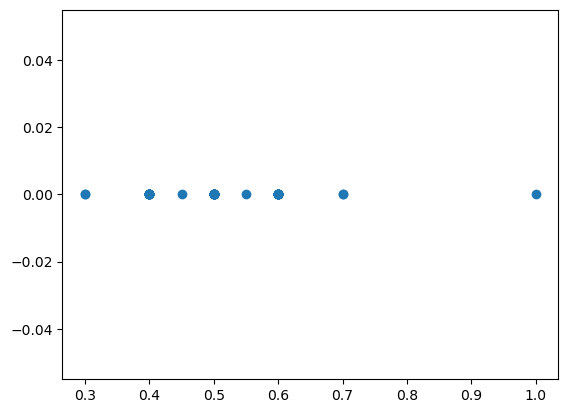

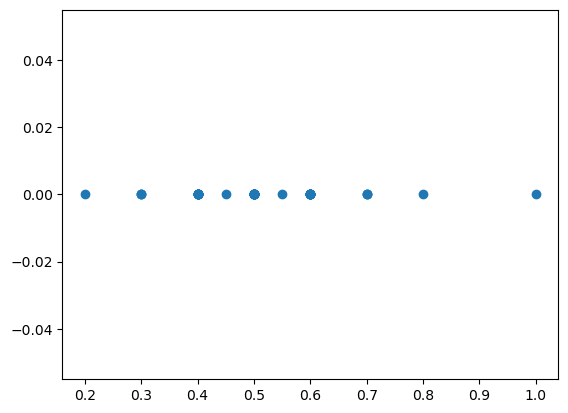

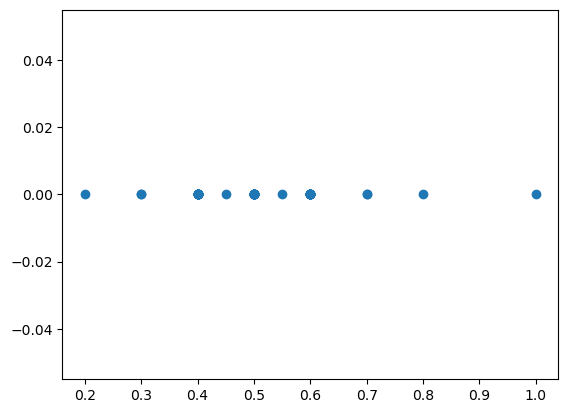

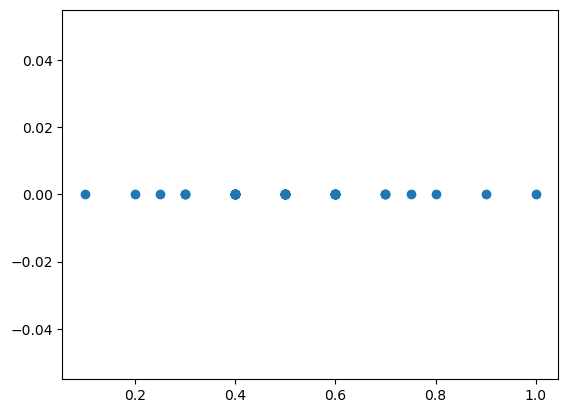

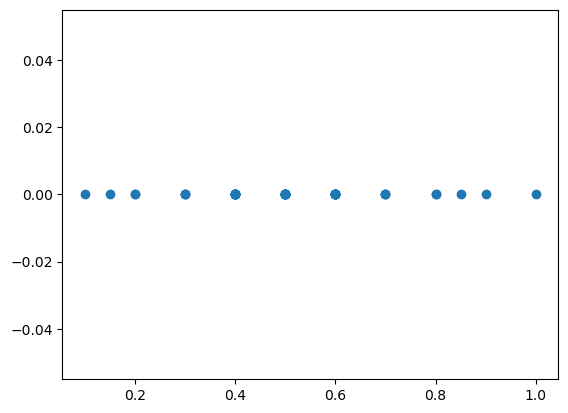

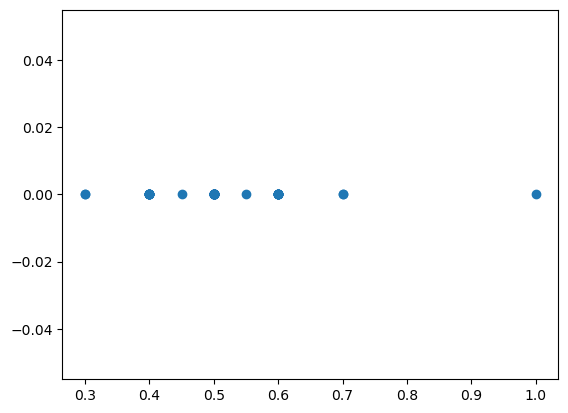

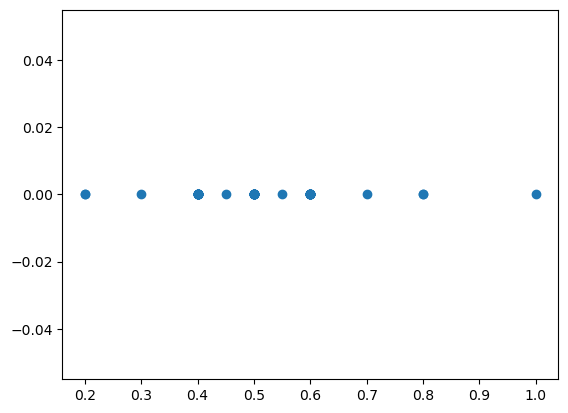

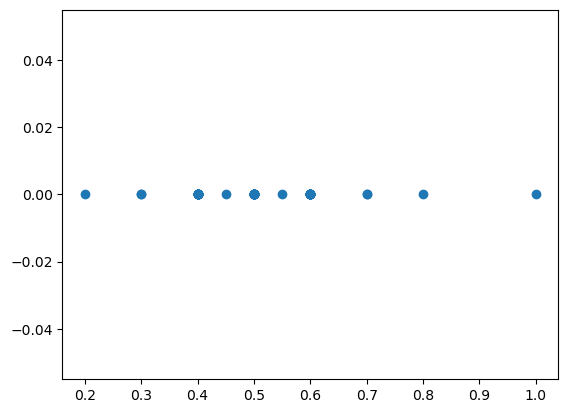

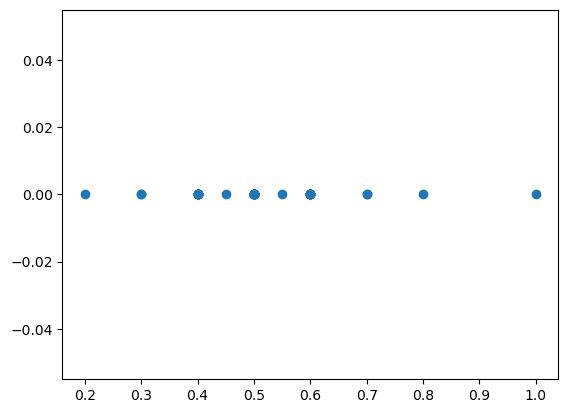

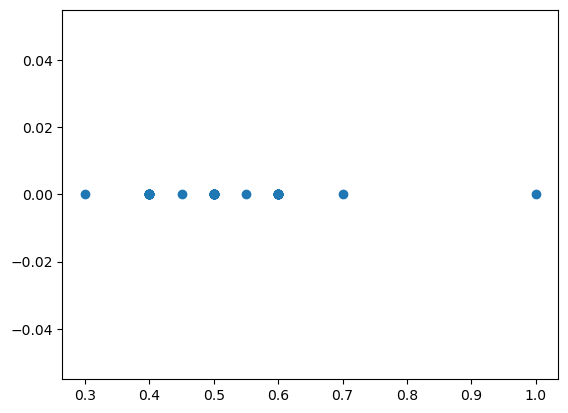

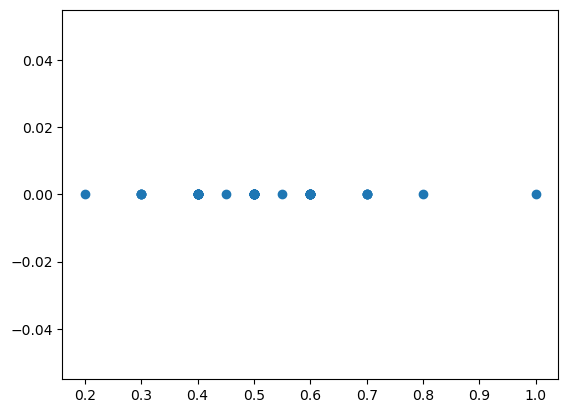

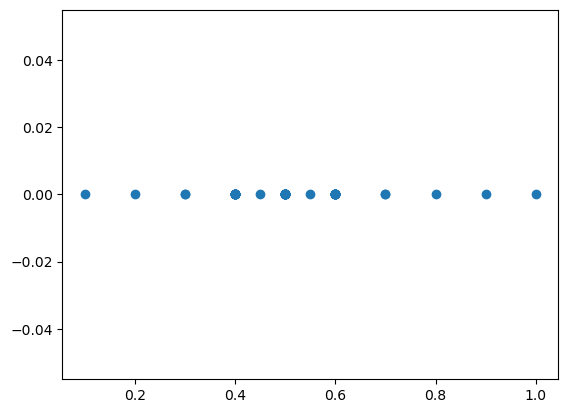

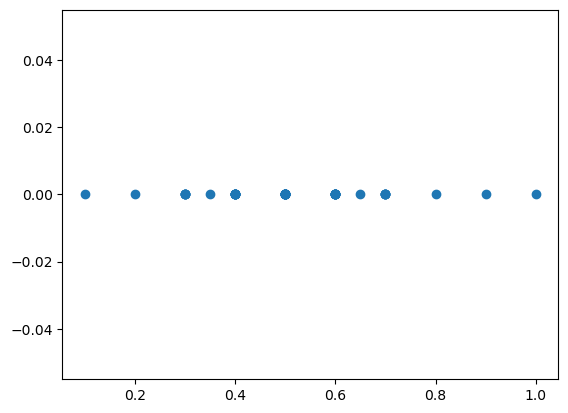

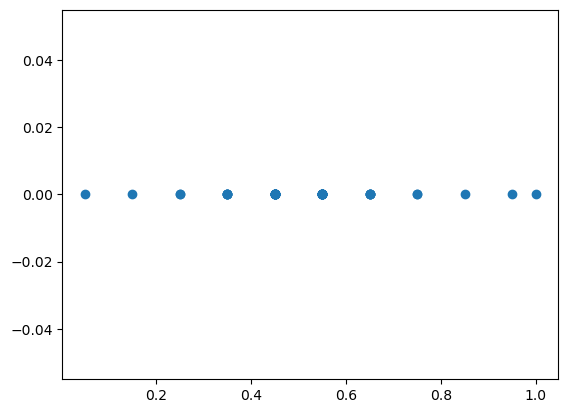

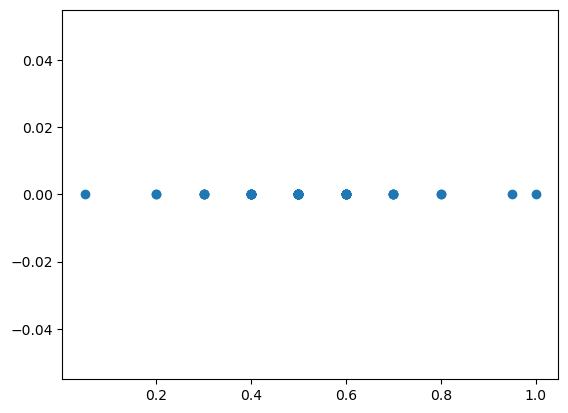

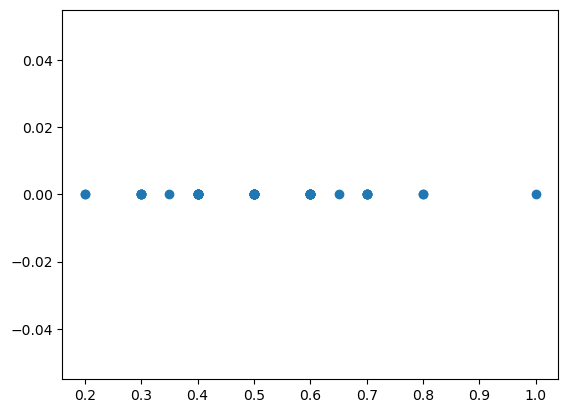

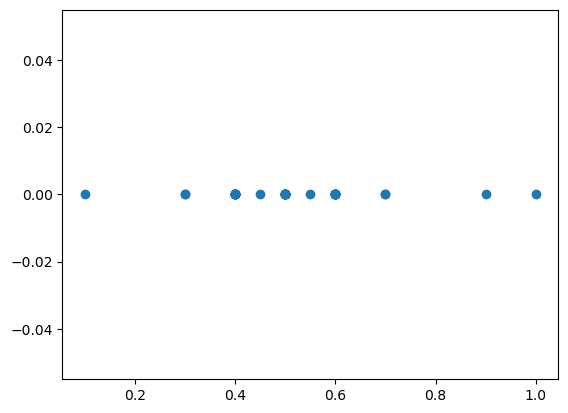

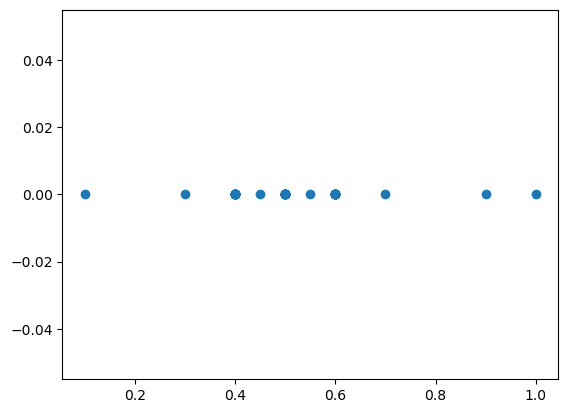

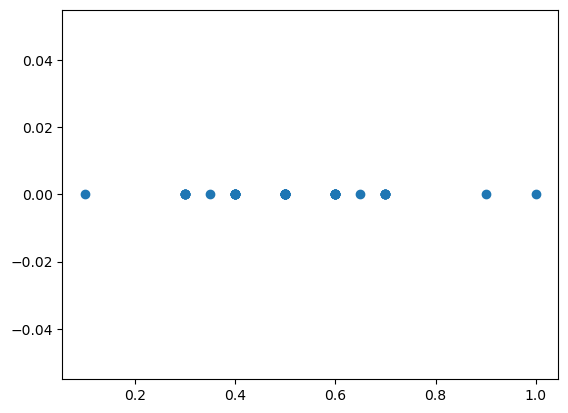

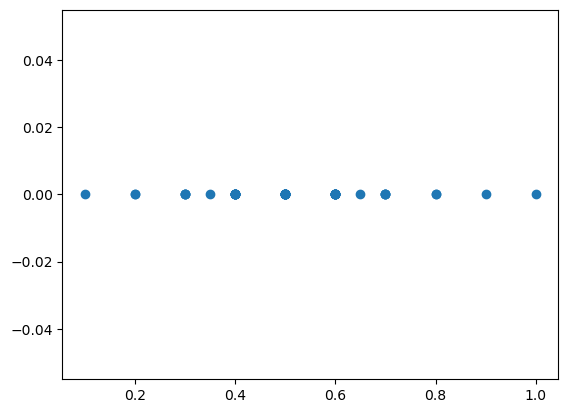

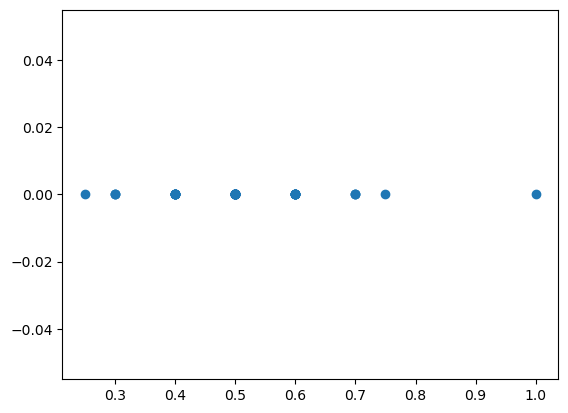

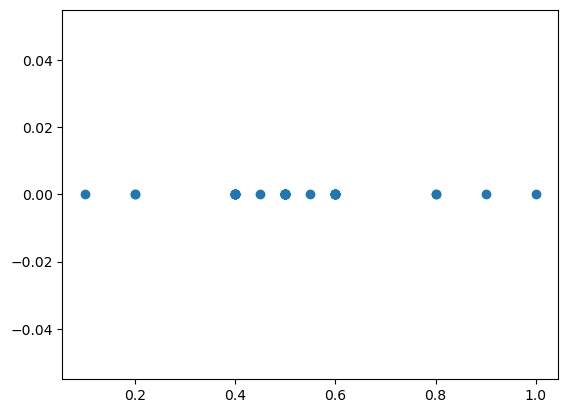

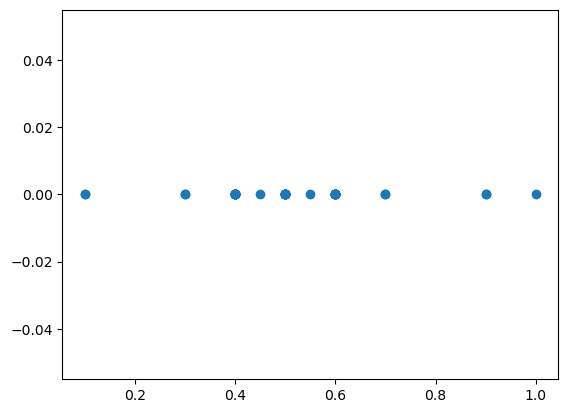

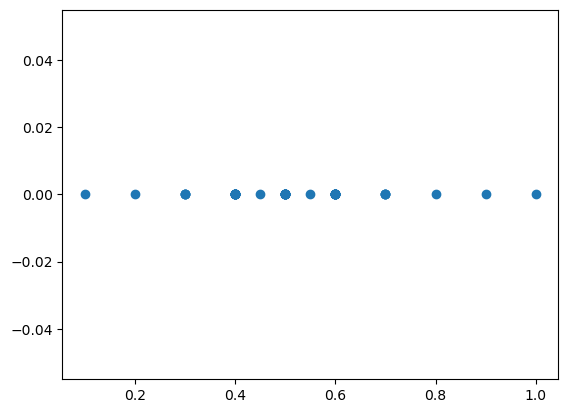

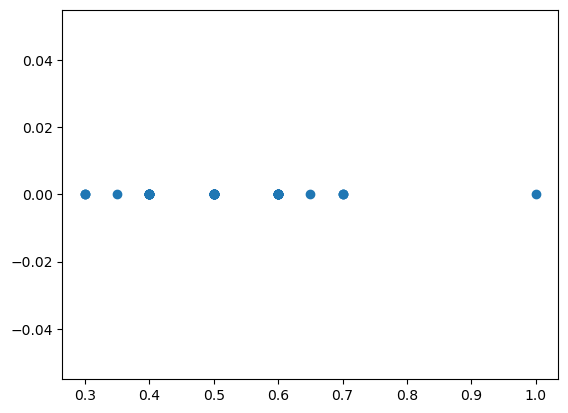

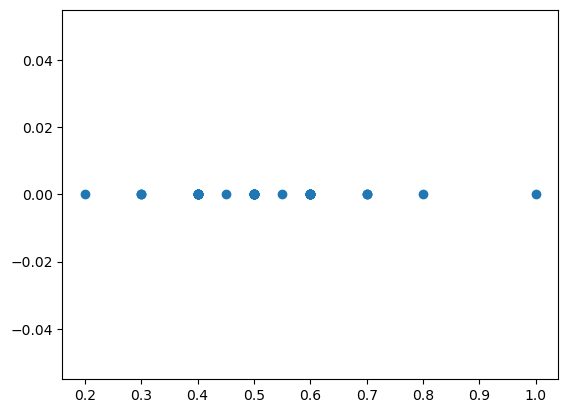

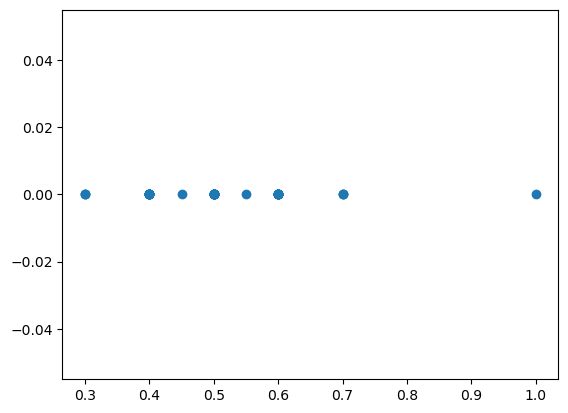

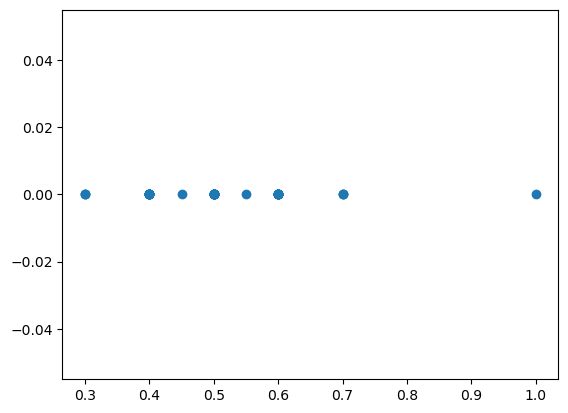

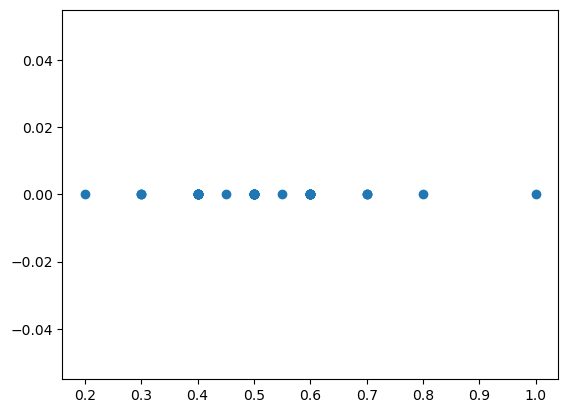

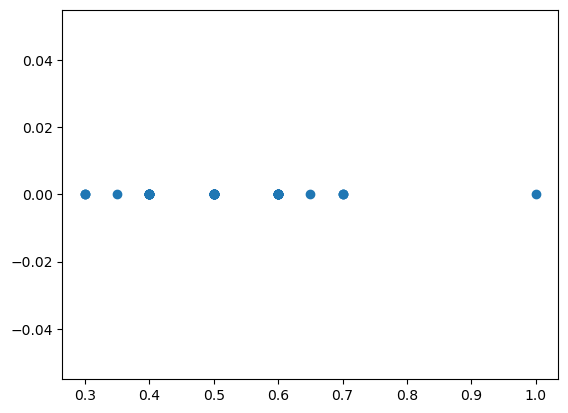

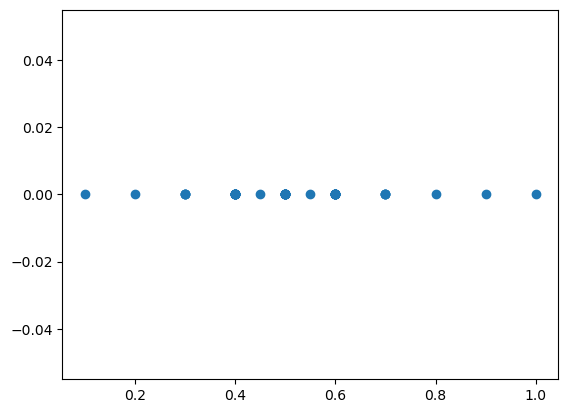

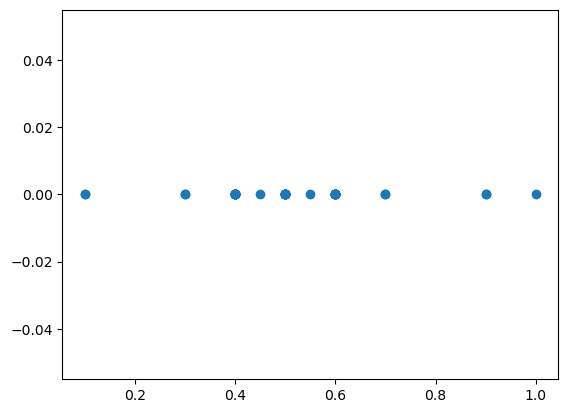

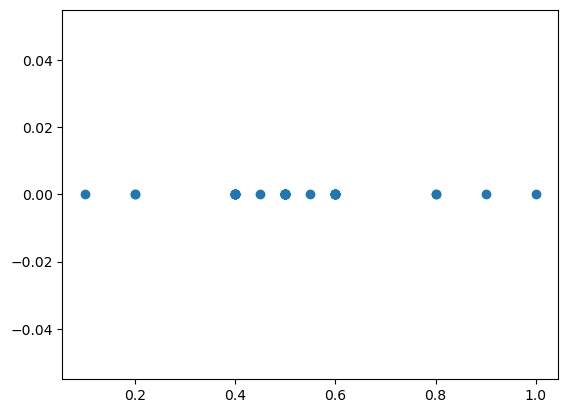

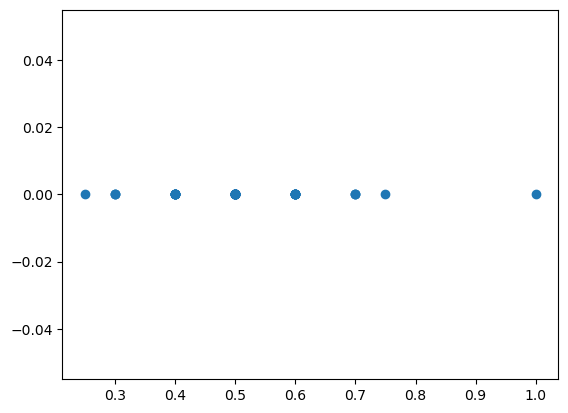

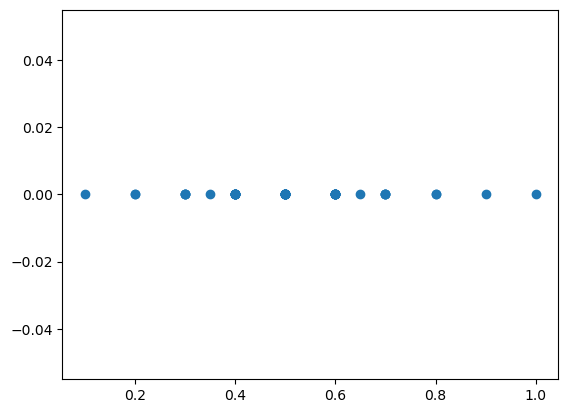

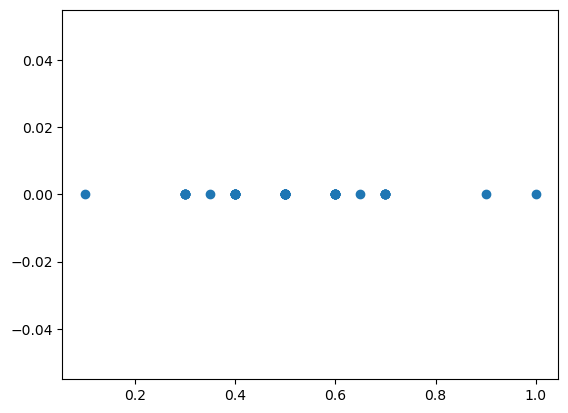

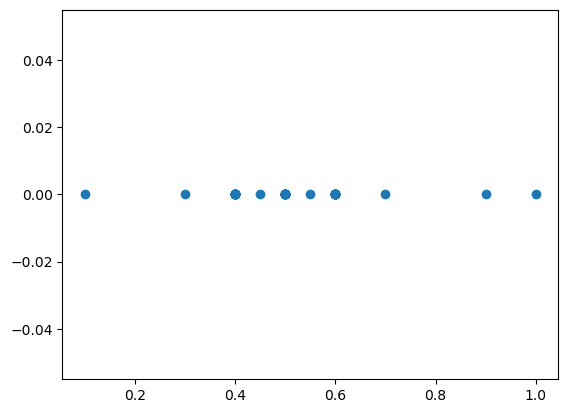

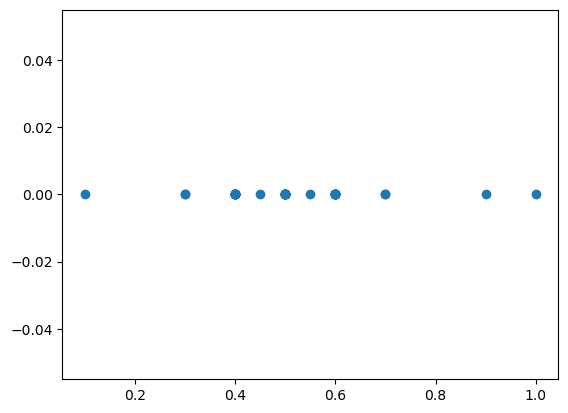

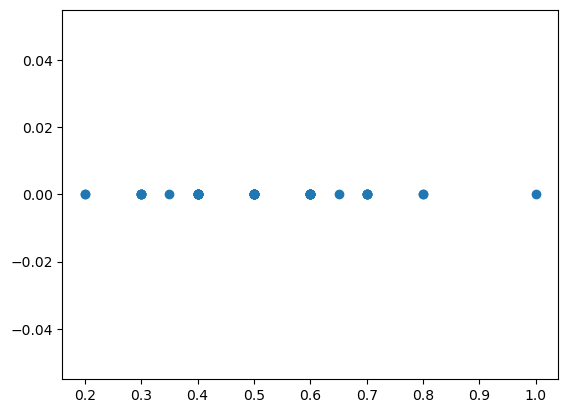

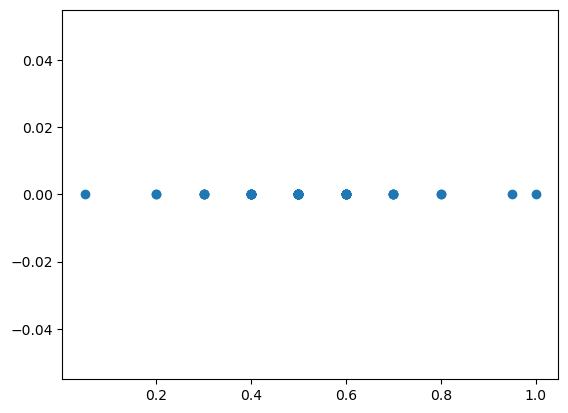

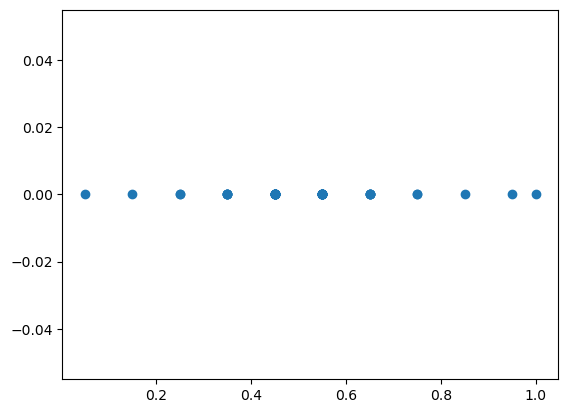

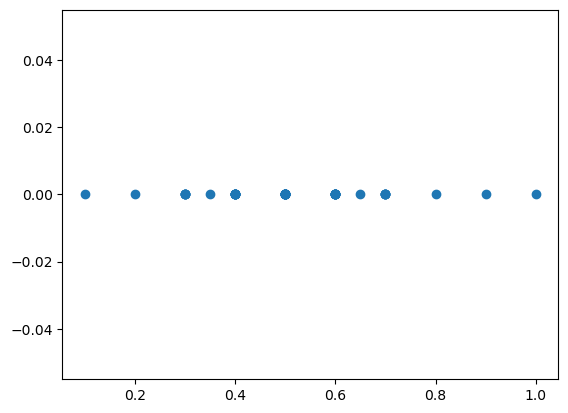

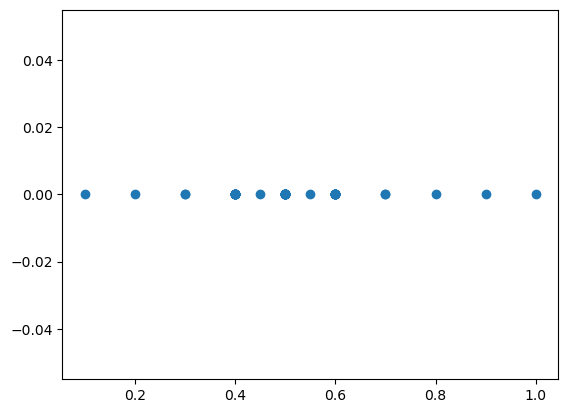

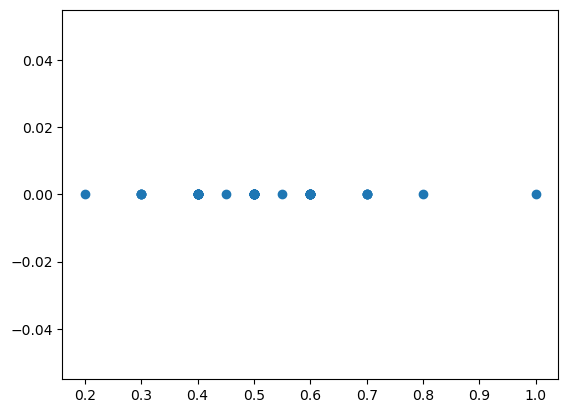

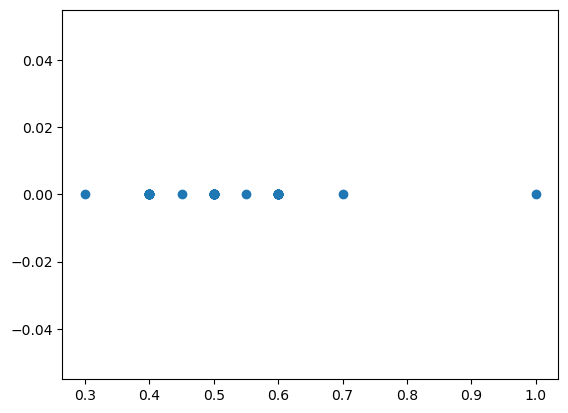

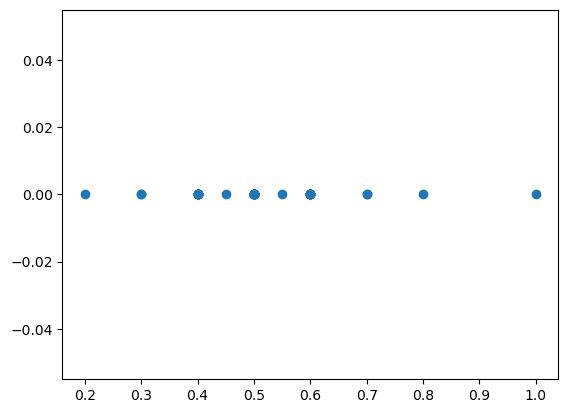

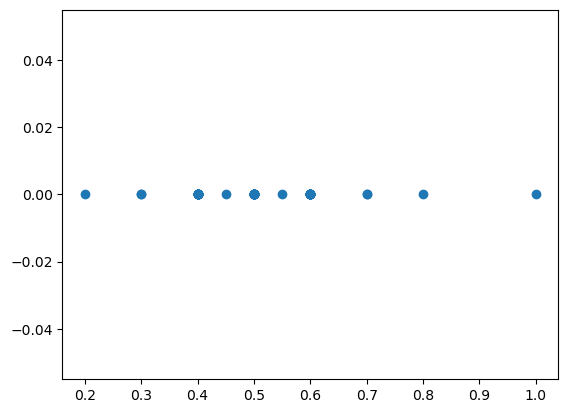

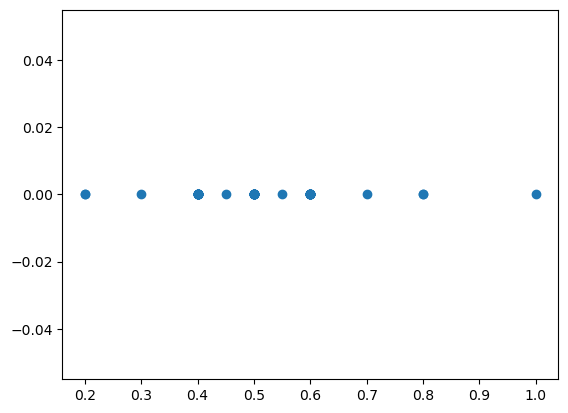

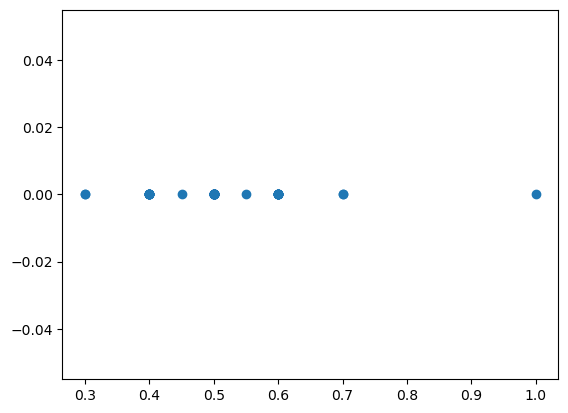

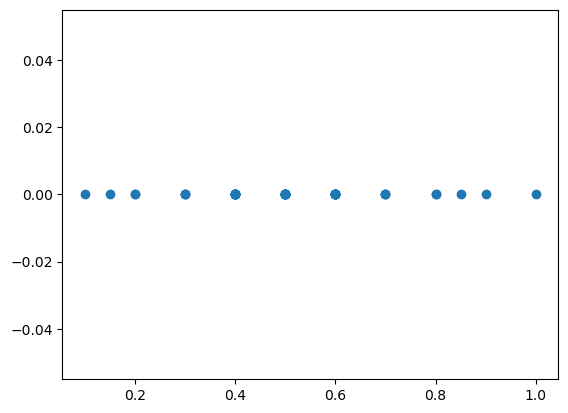

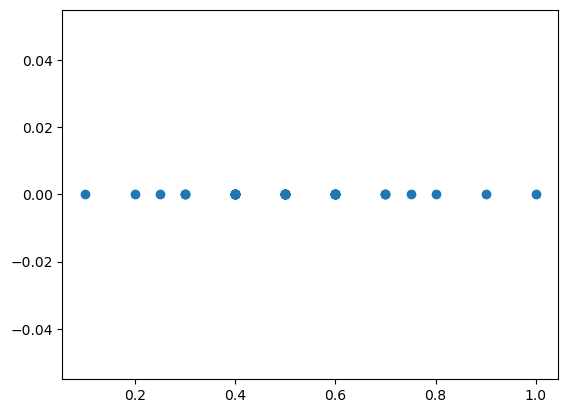

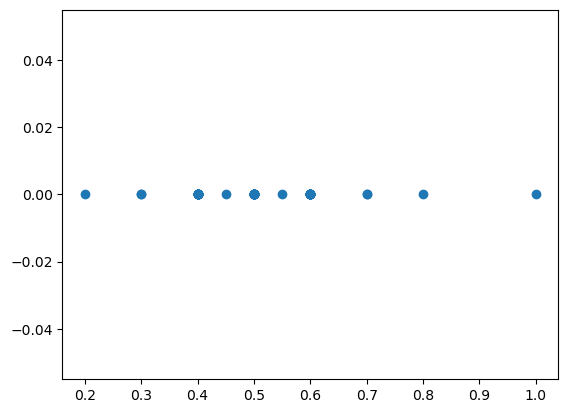

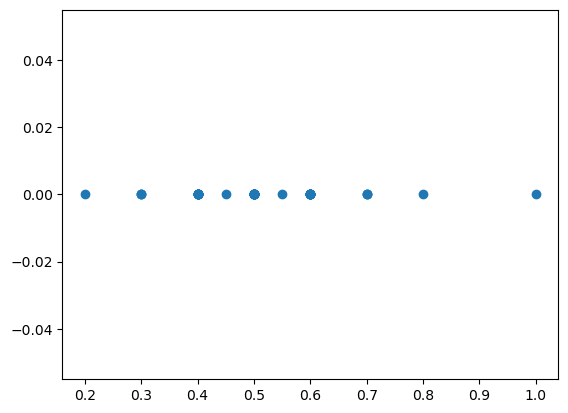

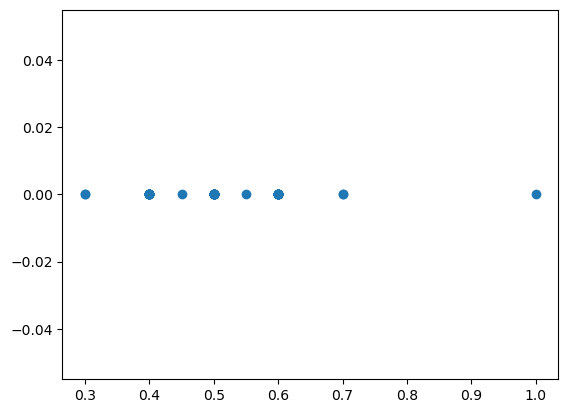

In [15]:
# def plots(data,value):
#     lst = []
#     for i in range(len(data)):
#         if i==value:
#             continue
#         lst+=[(Ham(data[value],data[i]))]
#     lst.sort()
#     lst2=[]
#     for i in lst:
#         lst2+=[0]
#     plt.scatter(lst,lst2)  
#     plt.show()
        
# def multiplots(data):
#     for i in range(len(data)):
#         plots(data,i)
        
# multiplots(A)
# # # x=0
# # check = []
# # for i in range(len(A)):
# #     if i==x:
# #         continue
# #     check+=[(Ham(A[x],A[i]))]



# # check.sort()
# # test = []
# # for i in check:
# #     test+=[0]
# # plt.scatter(check,test)  

In [236]:
def Hclassic(k):
    temp =np.zeros( (k, k) ) #create (n,n) matrix
    for i in range(0,k-1):
        for j in range(i+1,k):
            temp[i][j]=np.random.normal(0, 1)/np.sqrt(n) #insert random coupling strength
    return temp


def costhsk(V,H): #input bitstring, Hamiltonian
    return np.matmul(np.matmul(V,H),V)

def evlhsk(V,H):
    tempx=[]
    tempy=[]
    bit= []
    for j in product([-1, 1], repeat=V):
        if costhsk(j,H)/len(H)>0.5: #We only want near joptimal solution and roughly optimal solution >0.73
            bit +=[j]
            tempx+=[Dist(j)]
            tempy+=[costhsk(j,H)/len(H)]
    return(tempx,tempy,bit)

def branch(bit):
    return np.append(bit,[1]),np.append(bit,[-1])

def bound(bit,H):
    x = len(bit)
    temp = bit.copy()
    lst = [0 for i in range(x)]
    if x == len(H):
        return costhsk(bit,H)
    while x<len(H):
        temp = np.append(temp,[0])
        lst=np.append(lst,[1])
        x+= 1
    value = costhsk(temp,H)
    value += np.matmul(np.abs(np.matmul(temp,H)),lst)
    value += np.matmul(np.abs(np.matmul(lst,np.abs(H))),lst)
    return value

def getstrings(bit,H,threshold):
    global tempx,tempy,lst
    if (bound(bit,H)/len(H))>threshold:
        if len(bit)==len(H):
            if (costhsk(bit,H)/len(H))> threshold:
                lst +=[bit]
                tempx+=[Dist(bit)]
                tempy+=[costhsk(bit,H)/len(H)]
        else:
            bit1,bit2=branch(bit)
            getstrings(bit1,H,threshold)
            getstrings(bit2,H,threshold)
    return("done")
    
    
        
    
    
    
#np.append(np.array([1,1,1]),[-1,-1,-1])    




# m=29
# HSK= Hclassic(m)     
# start = timeit.default_timer()
# xtest,ytest,bit2=evlhsk(m,HSK)
# print("The difference of time is :", 
#                (timeit.default_timer() - start)/(60),"min")


In [351]:
m=30
HSK = Hclassic(m)
bound([1],HSK)/m

2.4076870959378094

### depending on threshold, at $m=28$ and threshold $0.5$ roughly $4.2$ minutes

### The same instance of Hamiltonian $m=28$ but threshold of 0.7 takes only roughy 1 min

In [341]:
tempx=[]
tempy=[]
lst= []
start = timeit.default_timer()
getstrings([1],HSK,0.65)
print("The difference of time is :", 
                (timeit.default_timer() - start)/(60),"min")

The difference of time is : 2.5255874550000046 min


In [342]:
len(tempy)

120

60


Text(0.5, 0, 'R$(z^1, z^2 )$')

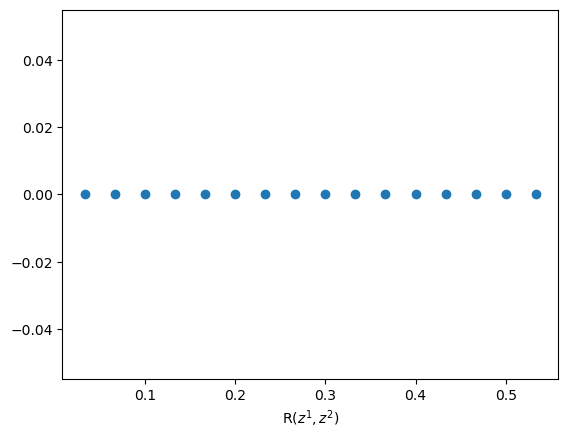

In [349]:
def eopt(databit,datay):
    temp = []
    x=max(datay)
    for i in range(len(datay)):
        if datay[i]>0*x:
            if databit[i][0]==1:
                temp+=[databit[i]]
    return temp

A=eopt(lst,tempy)
print(len(A))
C=OGP(A)
C=list(C)
C.sort()
D=[]
for i in C:
    D+=[0]

plt.scatter(C,D)
plt.xlabel('R$(z^1, z^2 )$')
# #plt.savefig('SK_OGP.png')
